In [1]:
"""
Name: example_prob_model_plot.ipynb
Authors: Stephan Meighen-Berger
Plots the used prob model
"""

'\nName: example_prob_model_plot.ipynb\nAuthors: Stephan Meighen-Berger\nPlots the used prob model\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from tqdm import tqdm
import pickle
from scipy.signal import find_peaks
from scipy.interpolate import RectBivariateSpline, UnivariateSpline
# from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
from fourth_day.pdfs import construct_pdf

In [5]:
# picture path
PICS = '../pics/'

In [6]:
# Plotting standards
std_size = 6.
fontsize = 20.
lw=1.
h_length=1.

In [7]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [10]:
data_0 = pickle.load( open("probability_model/offcenter_v2_0.pkl", "rb" ) )
data_1 = pickle.load( open("probability_model/offcenter_v2_1.pkl", "rb" ) )
data_2 = pickle.load( open("probability_model/offcenter_v2_2.pkl", "rb" ) )
data_3 = pickle.load( open("probability_model/offcenter_v2_3.pkl", "rb" ) )
data_5 = pickle.load( open("probability_model/offcenter_v2_5.pkl", "rb" ) )

In [40]:
id_alpha = 0
counts_0, edges_0 = np.histogram(
    data_0['x_arr'][id_alpha],
    bins=np.linspace(0., 26., 131),
    weights=1./data_0['norm'][id_alpha]
)
counts_1, edges_1 = np.histogram(
    data_1['x_arr'][id_alpha],
    bins=np.linspace(0., 26., 131),
    weights=1./data_1['norm'][id_alpha]
)
counts_2, edges_2 = np.histogram(
    data_2['x_arr'][id_alpha],
    bins=np.linspace(0., 26., 131),
    weights=1./data_2['norm'][id_alpha]
)
counts_3, edges_3 = np.histogram(
    data_3['x_arr'][id_alpha],
    bins=np.linspace(0., 26., 131),
    weights=1./data_3['norm'][id_alpha]
)
counts_5, edges_5 = np.histogram(
    data_5['x_arr'][id_alpha],
    bins=np.linspace(0., 26., 131),
    weights=1./data_5['norm'][id_alpha]
)

In [41]:
spl_prob = RectBivariateSpline(
    (edges_0[1:] + edges_0[:-1]) / 2.,
    np.array([0., 1., 2., 3., 5.]),
    np.array([counts_0, counts_1, counts_2, counts_3, counts_5]).T, s=0.4)

In [42]:
dx2, dy2 = 0.1, 0.1
x2 = np.arange(0., 3., dx2)
y2 = np.arange(0., 26., dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = spl_prob(y2, x2)
Z2[Z2 < 0.] = 0.

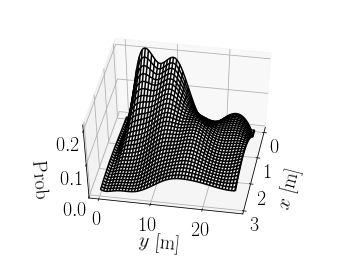

In [43]:
from mpl_toolkits import mplot3d
# %matplotlib notebook
figure, ax = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True, subplot_kw={'projection': '3d'})
ax.plot_wireframe(X2, Y2, Z2, color='k')
ax.set_xlabel(r"$x\;\mathrm{[m]}$", fontsize=fontsize, labelpad=1.5e1)
ax.set_ylabel(r"$y\;\mathrm{[m]}$", fontsize=fontsize, labelpad=1.5e1)
ax.set_zlabel(r"$\mathrm{Prob}$", fontsize=fontsize, labelpad=1.5e1)
ax.view_init(50, 10.)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax.set_zticks([0., 0.1, 0.2])
ax.dist = 12
figure.savefig(PICS + "3d_prob.png",
               bbox_inches='tight')